In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
cosmetics = pd.read_csv('cosmetics.csv')

In [ ]:
#Removing extra header columns that have crept in data because of merging
headerIndex = cosmetics[cosmetics['event_time']=='event_time'].index.tolist()

In [ ]:
cosmetics.drop(headerIndex,inplace=True)

In [5]:
cosmetics

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...,...
20692835,4156677,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
20692836,4156678,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
20692837,4156679,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
20692838,4156680,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


In [7]:
cosmetics['brand'].isna().sum()

8757117

In [8]:
8757117/20692840

0.423195511104324

In [17]:
price = cosmetics[cosmetics['price']>=0]['price']

In [18]:
price.describe()

count    2.069271e+07
mean     8.534984e+00
std      1.938117e+01
min      0.000000e+00
25%      2.060000e+00
50%      4.050000e+00
75%      7.060000e+00
max      3.277800e+02
Name: price, dtype: float64

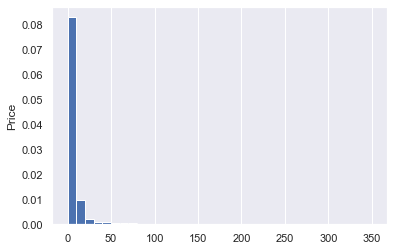

In [20]:
fig, ax = plt.subplots()
plt.hist(price,bins = [0,10,20,30,40,50,60,70,80,90,100,200,300,350], density = True)
ax.set_ylabel('Price')
ax.grid(axis='y')

In [ ]:
shoppers = cosmetics

In [ ]:
#Getting a sense of data
shoppers.info()
shoppers.head()

In [ ]:
#Changing data type of approproate columns
shoppers["price"] = pd.to_numeric(shoppers["price"])

In [ ]:
shoppers['event_time']

In [ ]:
shoppers['event_time'] = shoppers['event_time'].apply(lambda x: x[:19])

In [ ]:
shoppers['event_time']= pd.to_datetime(shoppers['event_time']) 

In [ ]:
# Getting Unique Values
#events = shoppers['event_type'].unique()

In [ ]:
#brands = shoppers['category_code'].unique()

In [ ]:
#categoryCodes = shoppers['category_code'].unique()

In [ ]:
#Removing the category_code column
shoppers.drop('category_code',axis=1,inplace=True)

In [ ]:
#shoppers = shoppers.dropna()
shoppers.count()

In [ ]:
shoppers['year'] = pd.DatetimeIndex(shoppers['event_time']).year
shoppers['month'] = pd.DatetimeIndex(shoppers['event_time']).month
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
shoppers['weekday'] = pd.DatetimeIndex(shoppers['event_time']).weekday.map(dayOfWeek)

In [ ]:
shoppers['hour'] = pd.DatetimeIndex(shoppers['event_time']).hour

In [ ]:
shoppers["product_id"] = pd.to_numeric(shoppers["product_id"])
shoppers["category_id"] = pd.to_numeric(shoppers["category_id"])
shoppers["user_id"] = pd.to_numeric(shoppers["user_id"])

In [ ]:
shoppers['event_type']= shoppers['event_type'].astype(str)
shoppers['brand']= shoppers['brand'].astype(str)

In [ ]:
#Pickling our data for faster access
shoppers.to_pickle("shoppers.pkl")

In [2]:
#Retreiving pickled data
shoppers = pd.read_pickle("shoppers.pkl")

In [ ]:
shoppers.head()

In [ ]:
#Checking Price distribution
sns.boxplot(x=shoppers["price"])

# 1. Most prices are between 0 and 8 (75%)
# 2. Overall prices vary between 0 to 350, prices above 150 are very rare

In [ ]:
# Event distribution Histogram
shoppers.event_type.value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Event distrubution",size=20)
plt.ylabel("Number of events \n ",size=15)
plt.xlabel("\n \n Event Name",size=15)
plt.xticks(size= 15,rotation = 0)
plt.yticks(size= 15)
plt.show()

# 1. Most events are view events
# 2. There are very few purchase events

In [ ]:
# # Product distribution Histogram
# shoppers.product_id.value_counts().plot(kind="bar", figsize=(10,5),color ='green')
# plt.title("Product distrubution",size=20)
# plt.ylabel("Number of events\n ",size=15)
# plt.xlabel("\n \n Product ID", size=15)
# plt.xticks(rotation = 0,size= 15)
# plt.yticks(size= 15)
# plt.show()

In [ ]:
# # Checking the relationship between price and purchase
# # Plotting a scatter plot

# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(shoppers["event_type"], shoppers["price"])
# ax.set_title("Event v/s Price distribution", size=15)
# ax.set_xlabel("\n \n Event Type", size=15)
# ax.set_ylabel("Price \n", size=15)
# plt.show()

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x='event_type',y='price',data=shoppers, hue='weekday')

# 1.  People view items of broad price range but purchase and add to cart of a smaller range i.e. low to mid
# 2.  Purchases don't vary much by the day of week

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x='event_type',y='price',data=shoppers, hue='hour')
plt.title("Purchase comparison by Price and Time of day",size=20)
plt.ylabel("Price \n ",size=15)
plt.xlabel("\n \n Event Type ID", size=15)
plt.xticks(rotation = 0,size= 15)
plt.yticks(size= 15)
plt.show()

In [ ]:
totalSessions = shoppers.groupby('user_id')[['user_session']].count()
totalSessions = totalSessions.rename(columns={'user_session':'total_sessions'})
totalSessions.head()

In [ ]:
totalSessions = shoppers.groupby('user_id')[['user_session']].count()
totalSessions = totalSessions.rename(columns={'user_session':'total_sessions'})
totalSessions.head()

In [ ]:
purchaseSessions = shoppers[shoppers['event_type']=='purchase'].groupby('user_id')[['user_session']].count()
purchaseSessions = purchaseSessions.rename(columns={'user_session':'purchase_sessions'})
purchaseSessions.head()

In [ ]:
cartSessions = shoppers[shoppers['event_type']=='cart'].groupby('user_id')[['user_session']].count()
cartSessions = cartSessions.rename(columns={'user_session':'cart_sessions'})
cartSessions.head()

In [ ]:
removeSessions = shoppers[shoppers['event_type']=='remove_from_cart'].groupby('user_id')[['user_session']].count()
removeSessions = removeSessions.rename(columns={'user_session':'remove_sessions'})
removeSessions.head()

In [ ]:
viewSessions = shoppers[shoppers['event_type']=='view'].groupby('user_id')[['user_session']].count()
viewSessions = viewSessions.rename(columns={'user_session':'view_sessions'})
viewSessions.head()

In [ ]:
m1 = pd.merge(totalSessions,purchaseSessions, on='user_id', how='outer')
m2 = pd.merge(m1, cartSessions, on='user_id', how='outer')
m3 = pd.merge(m2, removeSessions, on='user_id', how='outer')
merged = pd.merge(m3, viewSessions, on='user_id', how='outer')
merged = merged.fillna(0).sort_values(by='purchase_sessions',ascending=False)
merged.head(10)

## How many events in one user session

In [ ]:
total = shoppers.groupby('user_session')[['event_type']].count()
total = total.rename(columns={'event_type':'total_events'})
total.head()

In [ ]:
purchase = shoppers[shoppers['event_type']=='purchase'].groupby('user_session')[['event_type']].count()
purchase = purchase.rename(columns={'event_type':'purchase_events'})
purchase.head()

In [ ]:
cart = shoppers[shoppers['event_type']=='cart'].groupby('user_session')[['event_type']].count()
cart = cart.rename(columns={'event_type':'cart_events'})
cart.head()

In [ ]:
purchase = shoppers[shoppers['event_type']=='purchase'].groupby('user_session')[['event_type']].count()
purchase = purchase.rename(columns={'event_type':'purchase_events'})
purchase.head()

In [ ]:
remove = shoppers[shoppers['event_type']=='remove_from_cart'].groupby('user_session')[['event_type']].count()
remove = remove.rename(columns={'event_type':'remove_events'})
remove.head()

In [ ]:
view = shoppers[shoppers['event_type']=='view'].groupby('user_session')[['event_type']].count()
view = view.rename(columns={'event_type':'view_events'})
view.head()

In [ ]:
mer1 = pd.merge(total,purchase, on='user_id', how='outer')
mer2 = pd.merge(m1, cart, on='user_id', how='outer')
mer3 = pd.merge(m2, remove, on='user_id', how='outer')
Events_per_session = pd.merge(m3, view, on='user_id', how='outer')
Events_per_session = Events_per_session.fillna(0).sort_values(by='purchase',ascending=False)
Events_per_session.head(10)

In [ ]:
# merged['purchaseRatio']= merged['purchase_sessions']*100/merged['total_sessions']
# merged['cartRatio']= merged['cart_sessions']*100/merged['total_sessions']
# merged['removeRatio']= merged['remove_sessions']*100/merged['total_sessions']
# merged['viewRatio']= merged['view_sessions']*100/merged['total_sessions']

In [ ]:
# merged.drop(['total_sessions','purchase_sessions','cart_sessions','remove_sessions','view_sessions'],axis=1,inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["total_sessions"], merged["purchase_sessions"])

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["total_sessions"], merged["cart_sessions"])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["total_sessions"], merged["view_sessions"])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["total_sessions"], merged["remove_sessions"])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["view_sessions"], merged["cart_sessions"])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["cart_sessions"], merged["purchase_sessions"])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["view_sessions"], merged["purchase_sessions"])
plt.show()

### Duration vs Purchase

In [ ]:
def ammd(series):
    return max(series) - min(series)

In [ ]:
sessionDF = shoppers.groupby("user_session").count()

In [ ]:
sessionDuration = (shoppers.groupby('user_session').agg(ammd)[['event_time']])
sessionDuration.rename(columns={'event_time':'Duration'},inplace=True)

In [ ]:
userSsnDuration = pd.merge(sessionDF,sessionDuration,on='user_session',how='outer')
userSsnDuration.drop(['event_time', 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_id', 'year', 'month', 'weekday', 'hour'],axis=1,inplace=True)

In [ ]:
userSsnDuration.head()

In [ ]:
purchaseDF = shoppers[shoppers['event_type']=='purchase'].groupby('user_session').count()
purchaseDF.drop(['event_type', 'product_id', 'price','category_id', 'brand', 'user_id', 'year', 'month', 'weekday', 'hour'],axis=1,inplace=True)
purchaseDF = purchaseDF.rename(columns={'event_time':'purchases'})

In [ ]:
PurchaseTime = pd.merge(userSsnDuration,purchaseDF,on='user_session',how='outer').fillna(0.0)
PurchaseTime['Duration'] = PurchaseTime['Duration'].apply(lambda x: pd.Timedelta.total_seconds(x) )
PurchaseTime = PurchaseTime.sort_values(by='Duration',ascending=False)

In [ ]:
priceDF = shoppers[shoppers['event_type']=='purchase'].groupby('user_session')['price'].sum()

In [ ]:
PurchasePriceTime = pd.merge(PurchaseTime,priceDF,on='user_session',how='outer').fillna(0.0)
PurchasePriceTime

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lmplot(x='Duration', y='purchases', data=PurchasePriceTime, hue ='price')
plt.show()

In [ ]:
shoppers.loc[(shoppers['event_type']=='purchase'),['product_id','category_id','brand']].groupby('brand').count().sort_values(by='product_id',ascending=False)

In [ ]:
shoppers.loc[(shoppers['event_type']=='purchase'),['product_id','category_id','brand']].groupby('category_id').count().sort_values(by='product_id',ascending=False)

In [ ]:
shoppers.loc[(shoppers['event_type']=='purchase'),['product_id','category_id','brand']].groupby('product_id').count().sort_values(by='category_id',ascending=False)

In [ ]:
PurchasePerSession = shoppers[shoppers['event_type']=='purchase'].groupby(['user_id','user_session']).count()#.sort_values(by='product_id')
PurchasePerSession

In [ ]:
TotalPurchases = shoppers[shoppers['event_type']=='purchase'].groupby(['user_id']).count()
TotalPurchases.drop([ 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_session', 'year', 'month', 'weekday', 'hour'],axis=1,inplace=True)
TotalPurchases.rename(columns={'event_time':'Total_Purchases_Made'},inplace=True)

In [ ]:
NumSessions = PurchasePerSession.groupby(['user_id']).count()
NumSessions.drop([ 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'year', 'month', 'weekday', 'hour'],axis=1,inplace=True)
NumSessions.rename(columns={'event_time':'Purchase_Sessions'},inplace=True)

In [ ]:
SessionPurchaseRatio= pd.merge(NumSessions,TotalPurchases,on='user_id',how='outer')
SessionPurchaseRatio = SessionPurchaseRatio.sort_values(by='Purchase_Sessions',ascending=False)
SessionPurchaseRatio

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Purchase_Sessions', y='Total_Purchases_Made', data=SessionPurchaseRatio,estimator=None)
plt.show()

In [ ]:
shoppers.head()

In [ ]:
cartData = shoppers.loc[shoppers['event_type']=='cart',['event_time','product_id','user_id','brand']].sort_values(by='user_id')
cartData = cartData.groupby('product_id').count()
cartData = cartData.drop(["event_time","user_id"],axis=1).rename(columns={"brand":"NumCart"})
cartData

In [ ]:
purchaseData = shoppers.loc[shoppers['event_type']=='purchase',['event_time','product_id','user_id','brand']].sort_values(by='user_id')
purchaseData = purchaseData.groupby('product_id').count()
purchaseData = purchaseData.drop(["event_time","user_id"],axis=1).rename(columns={"brand":"NumPurchase"})
purchaseData

In [ ]:
removeData = shoppers.loc[shoppers['event_type']=='remove_from_cart',['event_time','product_id','user_id','brand']].sort_values(by='user_id')
removeData = removeData.groupby('product_id').count()
removeData = removeData.drop(["event_time","user_id"],axis=1).rename(columns={"brand":"NumRemove"})
removeData

In [ ]:
viewData = shoppers.loc[shoppers['event_type']=='view',['event_time','product_id','user_id','brand']].sort_values(by='user_id')
viewData = viewData.groupby('product_id').count()
viewData = viewData.drop(["event_time","user_id"],axis=1).rename(columns={"brand":"NumView"})
viewData

In [ ]:
viewCart = pd.merge(viewData,cartData,on="product_id",how="outer")
removeViewCart = pd.merge(viewCart,removeData,on="product_id",how="outer")
OverallProduct = pd.merge(removeViewCart,purchaseData,on="product_id",how="outer")
OverallProduct = OverallProduct.fillna(0.0).sort_values(by="NumView",ascending=False)
OverallProduct

In [ ]:
shoppers.head()

In [ ]:
sns.boxplot(data=shoppers, x='weekday', y='price')

In [ ]:
sns.boxplot(data=shoppers, x='hour', y='price')

In [ ]:
plt.hist

# More

In [5]:
shoppers = pd.read_pickle('shoppers.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'shoppers.pkl'

In [3]:
shoppers.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,weekday,hour
0,0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019,10,Tuesday,0
1,1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019,10,Tuesday,0
2,2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019,10,Tuesday,0
3,3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019,10,Tuesday,0
4,4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019,10,Tuesday,0


In [4]:
labels = ['view', 'cart','remove_from_cart''purchase']
size = shoppers['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral','lightblue']
explode = [0, 0.1,0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

NameError: name 'shoppers' is not defined

In [4]:
shoppers = shoppers.drop(['Unnamed: 0'], axis = 1)

In [202]:
Event_for_plot = shoppers.sort_values(['product_id','user_id','event_time'])

In [5]:
Events = shoppers.set_index(['product_id','user_id'])

In [6]:
Product = shoppers[shoppers['event_type']=='purchase'].groupby('product_id', as_index= False).count()

In [200]:
Event_for_plot.head(100)

,,event_time,event_type,category_id,brand,price,user_session,year,month,weekday,hour
product_id,user_id,,,,,,,,,,
5773203,463240011,2019-10-01 00:00:00,cart,1487580005134238553,runail,2.62,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019,10,Tuesday,0
5773353,463240011,2019-10-01 00:00:03,cart,1487580005134238553,runail,2.62,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019,10,Tuesday,0
5881589,429681830,2019-10-01 00:00:07,cart,2151191071051219817,lovely,13.48,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019,10,Tuesday,0
5723490,463240011,2019-10-01 00:00:07,cart,1487580005134238553,runail,2.62,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019,10,Tuesday,0
5881449,429681830,2019-10-01 00:00:15,cart,1487580013522845895,lovely,0.56,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019,10,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...
5877456,527418424,2019-10-01 00:02:50,view,1487580006300255120,jessnail,122.22,86e77869-afbc-4dff-9aa2-6b7dd8c90770,2019,10,Tuesday,0
5864736,464191317,2019-10-01 00:02:52,remove_from_cart,2055161088059638328,bpw.style,1.59,349ca354-d983-4e7e-b2bc-63886d42d378,2019,10,Tuesday,0
5742402,543446752,2019-10-01 00:02:53,cart,1487580009362096156,nan,1.03,4a01cad9-7368-fd9e-d907-d4d85de0b55c,2019,10,Tuesday,0


In [7]:
Events.sort_values(['product_id','user_id','event_time']).head(30)

event_time event_type          category_id  \
product_id user_id                                                         
3752       241524986 2019-11-26 10:45:39       view  1487580005411062629   
           246225692 2020-01-20 05:55:21       view  1487580005411062629   
           246225692 2020-02-28 19:33:09       view  1487580005411062629   
           306131139 2019-10-01 12:11:11       view  1487580005411062629   
           382915461 2019-11-26 06:09:46       view  1487580005411062629   
           408427998 2019-12-06 20:52:35       view  1487580005411062629   
           411133227 2019-12-12 09:54:04       view  1487580005411062629   
           427198765 2020-02-22 05:59:46       view  1487580005411062629   
           439057206 2019-11-17 16:50:51       view  1487580005411062629   
           447983398 2020-01-06 20:18:49       view  1487580005411062629   
           470621203 2019-12-11 06:22:04       view  1487580005411062629   
           478048162 2019-11-30 16:03:11       view  1487580005411062629   
           479928991 2020-01-28 10:56:51       view  1487580005411062629   
           491861121 2019-11-22 04:55:45       view  1487580005411062629   
           507022668 2020-01-27 15:59:54       view  1487580005411062629   
           508230164 2020-01-23 04:20:00       view  1487580005411062629   
           525448973 2019-10-20 11:26:51       view  1487580005411062629   
           525448973 2019-10-20 14:35:32       view  1487580005411062629   
           527366125 2020-01-05 15:59:53       view  1487580005411062629   
           527744323 2020-01-26 03:49:10       view  1487580005411062629   
           529152541 2019-12-27 08:01:43       view  1487580005411062629   
           543825317 2019-10-18 06:15:57       view  1487580005411062629   
           543825317 2019-10-18 06:18:32       view  1487580005411062629   
           544239259 2020-02-21 19:24:34       view  1487580005411062629   
           546260590 2020-01-24 00:28:43       view  1487580005411062629   
           552080210 2019-12-27 14:59:10       view  1487580005411062629   
           552966434 2019-10-31 12:45:39       view  1487580005411062629   
           553683014 2019-12-02 23:22:48       view  1487580005411062629   
           558771491 2019-10-10 11:21:17       view  1487580005411062629   
           558771491 2020-02-03 05:38:03       view  1487580005411062629   

                     brand  price                          user_session  year  \
product_id user_id                                                              
3752       241524986   cnd  15.71  19158264-5594-47ac-81f9-bf27865f23ca  2019   
           246225692   cnd  15.71  b0d2a319-197d-4875-baff-e2b3f33d0ff9  2020   
           246225692   cnd  15.71  32651d0e-229a-4042-9b48-ff506c1044dc  2020   
           306131139   cnd  15.71  7a03835b-217e-4f6e-a5f8-11e5ae5652c6  2019   
           382915461   cnd  15.71  8a3ecc2d-d273-4484-9f46-05c11ecca899  2019   
           408427998   cnd  15.71  9c4f5b32-5af6-461c-8b19-e181de4803ec  2019   
           411133227   cnd  15.71  3dc0082c-d513-4013-bb2d-f2f9afc7ef83  2019   
           427198765   cnd  15.71  b1da3bb5-79cc-4a6e-890b-df846eeb4068  2020   
           439057206   cnd  15.71  88d061cc-91c0-4b46-96f9-83c36a3a8db2  2019   
           447983398   cnd  15.71  f7b8de3f-33f0-4e3f-ac59-5b2726f13c1f  2020   
           470621203   cnd  15.71  f02a13c3-23c5-4547-962d-908735032dec  2019   
           478048162   cnd  15.71  421e77ca-c333-4136-a15c-54efba96f3c9  2019   
           479928991   cnd  15.71  4ac71993-f71d-440c-8eb3-551d367b6c46  2020   
           491861121   cnd  15.71  e407e813-e321-49f8-bfe6-d4029a3765ad  2019   
           507022668   cnd  15.71  c062220f-de15-4e4d-b3c8-4f99a14955dd  2020   
           508230164   cnd  15.71  4db98842-393f-4ddf-8fdf-fd8eaf9c3f5a  2020   
           525448973   cnd  15.71  fefc3f7c-8625-42ae-bf8b-0eff441598eb  2019   
           525448973   cnd  15.71  7441d687-b7bf-403e-9919

In [8]:
Events['Purchases'] = Events['event_type'] == 'purchase'

In [ ]:
Events.head(50)

In [23]:
purchase1 = Purchases.iloc[1]

In [203]:
Event_for_plot['sequence'] = Event_for_plot['product_id'].astype(str)+Event_for_plot['user_id'].astype(str)

In [204]:
Session_Count = Event_for_plot[Event_for_plot['sequence'].isin(Purchases['sequence'])].groupby(['product_id','user_id'])['event_type'].nunique()

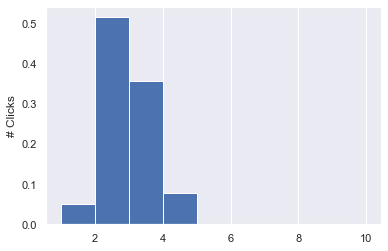

In [205]:
fig, ax = plt.subplots()
plt.hist(Session_Count, bins = [1,2,3,4,5,6,7,8,9,10],density = True)
ax.set_ylabel('# Clicks')
ax.grid(axis='y')

In [206]:
Not_purchase_session = Event_for_plot[~Event_for_plot['sequence'].isin(Purchases['sequence'])].groupby(['product_id','user_id'])['user_session'].nunique()

In [108]:
Not_purchase_session.head()

product_id  user_id  
3752        241524986    1
            246225692    2
            306131139    1
            382915461    1
            408427998    1
Name: user_session, dtype: int64

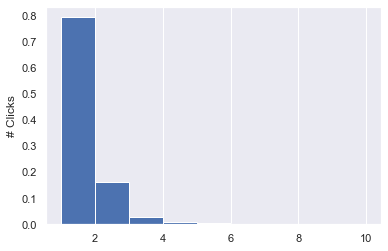

In [207]:
fig, ax = plt.subplots()
plt.hist(Not_purchase_session, bins = [1,2,3,4,5,6,7,8,9,10],density = True)
ax.set_ylabel('# Clicks')
ax.grid(axis='y')

# New Data

In [2]:
df = pd.read_pickle('shoppersnew.pkl')

In [3]:
df.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,weekday,hour
0,2019-12-01 00:00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019,12,Sunday,0
1,2019-12-01 00:00:00,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019,12,Sunday,0
2,2019-12-01 00:00:02,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019,12,Sunday,0
3,2019-12-01 00:00:05,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019,12,Sunday,0
4,2019-12-01 00:00:07,view,5824148,1487580005511725929,nan,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019,12,Sunday,0


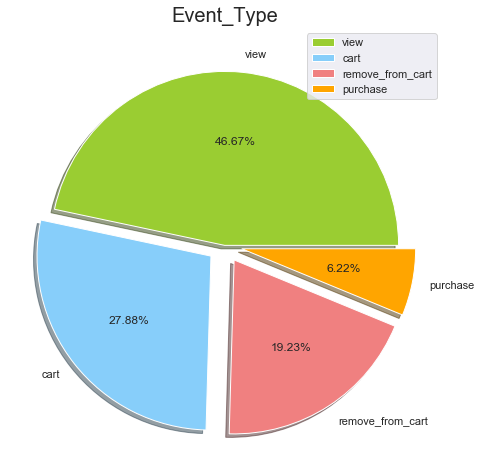

In [4]:
labels = ['view', 'cart','remove_from_cart','purchase']
size = df['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral','orange']
explode = [0, 0.1,0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [53]:
Info = df.sort_values('event_time').groupby(['user_session'])

In [7]:
new_features

,user_session,event_type
0,0000061d-f3e9-484b-8c73-e54f355032a3,1
1,00000ac8-0015-4f12-996a-be2896323738,1
2,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1
3,000013d6-68a4-40cf-9452-6577dbfab515,20
4,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2
...,...,...
4535935,ffffeed4-b0dd-499c-ba8c-213a1ab9f50d,34
4535936,fffff319-41b2-4937-96bb-ac4aace7c300,1
4535937,fffff363-1257-4982-9e4f-da3b99b0719d,1
4535938,fffffa85-9968-4a7c-aac4-beb0a1992bbd,8


In [4]:
df['event_time']= pd.to_datetime(df['event_time']) 

In [11]:
new_features= Info['event_type'].count().reset_index()

IndexError: Column(s) event_type already selected

In [6]:
sales = df[df['event_time']<= '2020-01-31 23:59:59'].groupby('product_id')['event_type'].value_counts().unstack(fill_value = 0).loc[:,'purchase']


In [7]:
sales_per_month = (sales/4).reset_index()

In [8]:
sales_per_month = sales_per_month.rename(columns={'purchase':'Sales'})

In [103]:
new_features = pd.merge(new_features,sales_per_month, how='left',on = ['product_id'])

In [11]:
new_features

,product_id,user_id,event_type,Sales
0,3752,241524986,1,0.0
1,3752,246225692,2,0.0
2,3752,306131139,1,0.0
3,3752,382915461,1,0.0
4,3752,408427998,1,0.0
...,...,...,...,...
10157285,5932595,621638689,1,NaN
10157286,5932595,621827479,1,NaN
10157287,5932595,621829631,1,NaN
10157288,5932595,621885871,1,NaN


In [104]:
new_features['# Sessions'] = Info['user_session'].nunique().reset_index()['user_session']

In [12]:
Duration = Info['event_time'].agg(['max','min']).diff(axis= 1)

In [13]:
Duration

,max,min
user_session,,
0000061d-f3e9-484b-8c73-e54f355032a3,NaT,0 days 00:00:00
00000ac8-0015-4f12-996a-be2896323738,NaT,0 days 00:00:00
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,NaT,0 days 00:00:00
000013d6-68a4-40cf-9452-6577dbfab515,NaT,-1 days +21:55:17
00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,NaT,-1 days +23:47:24
...,...,...
ffffeed4-b0dd-499c-ba8c-213a1ab9f50d,NaT,-15 days +12:42:43
fffff319-41b2-4937-96bb-ac4aace7c300,NaT,0 days 00:00:00
fffff363-1257-4982-9e4f-da3b99b0719d,NaT,0 days 00:00:00


In [14]:
Duration_data = Duration['min'].dt.total_seconds().div(60).astype(int)

In [15]:
new_features['InteractionTime'] = abs(Duration_data.values)

In [16]:
purchase = Info['event_type'].value_counts().unstack(fill_value = 0).loc[:,'purchase']

In [19]:
new_features['last_time'] = Info['event_time'].max().values

In [107]:
new_features['max_price'] = Info['price'].max().values

In [108]:
new_features['min_price'] = Info['price'].min().values

In [20]:
new_features = new_features.fillna(0)

In [21]:
new_features

,user_session,event_type,InteractionTime,last_time
0,0000061d-f3e9-484b-8c73-e54f355032a3,1,0,2020-01-16 03:30:41
1,00000ac8-0015-4f12-996a-be2896323738,1,0,2020-01-24 22:22:20
2,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1,0,2019-11-05 07:57:05
3,000013d6-68a4-40cf-9452-6577dbfab515,20,124,2019-10-23 11:12:21
4,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2,12,2019-12-20 20:50:05
...,...,...,...,...
4535935,ffffeed4-b0dd-499c-ba8c-213a1ab9f50d,34,20837,2019-10-17 22:42:32
4535936,fffff319-41b2-4937-96bb-ac4aace7c300,1,0,2019-12-19 13:25:56
4535937,fffff363-1257-4982-9e4f-da3b99b0719d,1,0,2019-12-03 06:53:01
4535938,fffffa85-9968-4a7c-aac4-beb0a1992bbd,8,15,2019-10-13 15:31:05


In [23]:
holiday = pd.read_csv('holidays.csv')

In [24]:
holiday['Date']= pd.to_datetime(holiday['Date']) 

In [25]:
holiday.sort_values('Date',ascending = False)

,Date,Holiday
0,2020-05-25,Memorial Day
1,2020-02-17,Washington's Birthday
2,2020-02-14,Valentine's Day
3,2020-02-02,Super Bowl
4,2020-01-25,Chinese New Year
5,2020-01-20,"Birthday of Martin Luther King, Jr."
6,2020-01-01,New Year's Day
7,2019-12-26,Boxing Day
8,2019-12-25,Christmas Day
9,2019-12-22,Super Saturday


In [26]:
holiday['Date'] = pd.DatetimeIndex(holiday['Date']).date

In [22]:
new_features['Date'] = pd.DatetimeIndex(new_features['last_time']).date

In [27]:
new_features = pd.merge(new_features,holiday, how='left',on = ['Date'])

In [28]:
new_features = new_features.fillna('None')

# Conversion Rate

### Total Conversion Rate is 1225772/10157290 = 0.120679

In [50]:
new_features[new_features['purchase']==True]

,product_id,user_id,event_type,Sales,# Sessions,InteractionTime,purchase,max_price,min_price,Date,Holiday
62,3762,150318419,3,62.75,1,6,True,19.37,19.37,2020-01-21,None
69,3762,201302301,3,62.75,1,10,True,19.37,19.37,2020-01-26,None
79,3762,231541482,6,62.75,4,8863,True,19.37,19.37,2019-12-20,None
81,3762,232032524,2,62.75,2,26,True,19.37,19.37,2020-01-29,None
93,3762,237006759,7,62.75,4,5837,True,19.37,19.37,2020-02-14,Valentine's Day
...,...,...,...,...,...,...,...,...,...,...,...
10157082,5932521,621622510,3,0.00,1,1,True,1.27,1.27,2020-02-28,None
10157100,5932532,620656666,2,0.00,1,25,True,1.43,1.43,2020-02-29,None
10157107,5932536,351818112,2,0.00,2,794,True,1.43,1.43,2020-02-29,None
10157175,5932578,458899726,2,0.00,2,26,True,6.02,6.02,2020-02-29,None


### When there's a sale, conversion rate = 62288/243520 = 0.25578

In [171]:
new_features[new_features['max_price']!= new_features['min_price']][new_features['purchase']==True]

/Users/arielliwenxi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,product_id,user_id,# Clicks,# Sessions,Duration,max_price,min_price,Date,Holiday,year,month,weekday,hour,purchase
110,3762,258117654,3,2,76314,19.37,18.4,2019-11-30,None,2019,11,Saturday,20,True
220,3762,369744446,5,3,5763,19.37,18.4,2019-12-03,None,2019,12,Tuesday,11,True
272,3762,396587616,3,3,4340,19.37,18.4,2019-11-28,Thanksgiving Day,2019,11,Thursday,5,True
472,3762,454455809,2,2,5294,19.37,18.4,2019-11-24,None,2019,11,Sunday,14,True
545,3762,469218581,5,2,47695,19.37,18.4,2019-11-28,Thanksgiving Day,2019,11,Thursday,9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10156689,5932188,619352755,3,2,39,1.62,0.0,2020-02-27,None,2020,2,Thursday,18,True
10156694,5932189,619352755,2,2,39,1.62,0.0,2020-02-27,None,2020,2,Thursday,18,True
10156702,5932190,619352755,2,2,39,1.62,0.0,2020-02-27,None,2020,2,Thursday,18,True
10156887,5932249,619352755,2,2,35,2.70,0.0,2020-02-27,None,2020,2,Thursday,18,True


In [173]:
new_features[new_features['max_price']!= new_features['min_price']]

,product_id,user_id,# Clicks,# Sessions,Duration,max_price,min_price,Date,Holiday,year,month,weekday,hour,purchase
83,3762,232696166,2,2,117116,19.37,18.4,2020-02-12,None,2020,2,Wednesday,1,False
110,3762,258117654,3,2,76314,19.37,18.4,2019-11-30,None,2019,11,Saturday,20,True
117,3762,261645463,2,2,23172,19.37,18.4,2019-11-29,Black Friday,2019,11,Friday,17,False
122,3762,268849449,5,3,30295,19.37,18.4,2019-12-14,None,2019,12,Saturday,16,False
153,3762,306962426,6,3,132407,19.37,18.4,2020-02-21,None,2020,2,Friday,17,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10157140,5932563,479796717,2,2,653,6.97,0.0,2020-02-29,None,2020,2,Saturday,2,False
10157170,5932576,613451540,5,4,1818,6.02,0.0,2020-02-29,None,2020,2,Saturday,21,False
10157177,5932578,523351759,7,5,1489,6.02,0.0,2020-02-29,None,2020,2,Saturday,16,False
10157183,5932579,523351759,4,3,1492,6.02,0.0,2020-02-29,None,2020,2,Saturday,16,False


### During holiday CR = 133126/1066001 = 0.12488

In [177]:
133126/1066001

0.12488356014675409

In [175]:
new_features[new_features['Holiday']!= 'None'][new_features['purchase']==True]

/Users/arielliwenxi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,product_id,user_id,# Clicks,# Sessions,Duration,max_price,min_price,Date,Holiday,year,month,weekday,hour,purchase
93,3762,237006759,7,4,5837,19.37,19.37,2020-02-14,Valentine's Day,2020,2,Friday,17,True
98,3762,245202883,2,2,16,19.37,19.37,2020-01-01,New Year's Day,2020,1,Wednesday,19,True
107,3762,254751820,3,2,54,18.40,18.40,2019-11-29,Black Friday,2019,11,Friday,1,True
130,3762,288191779,5,3,188753,19.37,19.37,2020-02-14,Valentine's Day,2020,2,Friday,19,True
272,3762,396587616,3,3,4340,19.37,18.40,2019-11-28,Thanksgiving Day,2019,11,Thursday,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10146621,5929512,493366979,3,1,17,1.43,1.43,2020-02-17,Washington's Birthday,2020,2,Monday,18,True
10146674,5929515,548503528,3,3,498,1.43,0.00,2020-02-17,Washington's Birthday,2020,2,Monday,20,True
10147046,5929545,493366979,3,1,18,1.43,1.43,2020-02-17,Washington's Birthday,2020,2,Monday,18,True
10147116,5929550,493366979,4,1,18,1.43,1.43,2020-02-17,Washington's Birthday,2020,2,Monday,18,True


In [176]:
new_features[new_features['Holiday']!= 'None']

,product_id,user_id,# Clicks,# Sessions,Duration,max_price,min_price,Date,Holiday,year,month,weekday,hour,purchase
23,3752,552966434,1,1,0,15.71,15.71,2019-10-31,Halloween,2019,10,Thursday,12,False
24,3752,553683014,1,1,0,15.71,15.71,2019-12-02,Cyber Monday,2019,12,Monday,23,False
33,3752,563763500,1,1,0,15.71,15.71,2020-02-02,Super Bowl,2020,2,Sunday,17,False
37,3752,570103973,1,1,0,15.71,15.71,2019-11-11,Veterans Day,2019,11,Monday,19,False
39,3752,571049377,6,5,2723,15.71,15.71,2020-01-20,"Birthday of Martin Luther King, Jr.",2020,1,Monday,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148120,5929673,472768954,1,1,0,0.00,0.00,2020-02-17,Washington's Birthday,2020,2,Monday,17,False
10148131,5929674,410144142,1,1,0,0.00,0.00,2020-02-17,Washington's Birthday,2020,2,Monday,15,False
10148210,5929678,410144142,1,1,0,0.00,0.00,2020-02-17,Washington's Birthday,2020,2,Monday,15,False
10148234,5929679,410144142,1,1,0,0.00,0.00,2020-02-17,Washington's Birthday,2020,2,Monday,15,False


## Add to cart or not CR= 1129944/ 4479276 = 0.252260

In [127]:
1129944/4479276

0.25226040994124943

In [125]:
new_features[new_features['# Cart']!=0][new_features['purchase']==True]

/Users/arielliwenxi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


event_type  Sales  # Sessions  Duration  max_price  \
product_id user_id                                                         
3762       150318419           3  62.75           1         6      19.37   
           201302301           3  62.75           1        10      19.37   
           231541482           6  62.75           4      8863      19.37   
           232032524           2  62.75           2        26      19.37   
           237006759           7  62.75           4      5837      19.37   
...                          ...    ...         ...       ...        ...   
5932521    621622510           3   0.00           1         1       1.27   
5932532    620656666           2   0.00           1        25       1.43   
5932536    351818112           2   0.00           2       794       1.43   
5932578    458899726           2   0.00           2        26       6.02   
5932583    458899726           2   0.00           2        26       6.02   

                      min_price        Date          Holiday  year  month  \
product_id user_id                                                          
3762       150318419      19.37  2020-01-21             None  2020      1   
           201302301      19.37  2020-01-26             None  2020      1   
           231541482      19.37  2019-12-20             None  2019     12   
           232032524      19.37  2020-01-29             None  2020      1   
           237006759      19.37  2020-02-14  Valentine's Day  2020      2   
...                         ...         ...              ...   ...    ...   
5932521    621622510       1.27  2020-02-28             None  2020      2   
5932532    620656666       1.43  2020-02-29             None  2020      2   
5932536    351818112       1.43  2020-02-29             None  2020      2   
5932578    458899726       6.02  2020-02-29             None  2020      2   
5932583    458899726       6.02  2020-02-29             None  2020      2   

                        weekday  hour  purchase  # Cart  
product_id user_id                                       
3762       150318419    Tuesday    14      True       1  
           201302301     Sunday    17      True       1  
           231541482     Friday    11      True       1  
           232032524  Wednesday    18      True       1  
           237006759     Friday    17      True       2  
...                         ...   ...       ...     ...  
5932521    621622510     Friday    19      True       1  
5932532    620656666   Saturday     0      True       1  
5932536    351818112   Saturday     8      True       1  
5932578    458899726   Saturday    12      True       1  
5932583    458899726   Saturday    12      True       1  

[1129944 rows x 14 columns]

In [126]:
new_features[new_features['# Cart']!=0]

event_type  Sales  # Sessions  Duration  max_price  \
product_id user_id                                                         
3762       37189384            1  62.75           1         0      19.37   
           79635674            2  62.75           1         0      18.40   
           150318419           3  62.75           1         6      19.37   
           159365622           5  62.75           2     38849      19.37   
           171848434           2  62.75           1         0      19.37   
...                          ...    ...         ...       ...        ...   
5932582    613451540           5   0.00           2       184       6.02   
5932583    458899726           2   0.00           2        26       6.02   
           539651760           1   0.00           1         0       6.02   
5932584    539567728           1   0.00           1         0       6.02   
           621994044           2   0.00           1         0       6.02   

                      min_price        Date Holiday  year  month    weekday  \
product_id user_id                                                            
3762       37189384       19.37  2019-12-30    None  2019     12     Monday   
           79635674       18.40  2019-11-23    None  2019     11   Saturday   
           150318419      19.37  2020-01-21    None  2020      1    Tuesday   
           159365622      19.37  2019-12-04    None  2019     12  Wednesday   
           171848434      19.37  2019-10-04    None  2019     10     Friday   
...                         ...         ...     ...   ...    ...        ...   
5932582    613451540       6.02  2020-02-28    None  2020      2     Friday   
5932583    458899726       6.02  2020-02-29    None  2020      2   Saturday   
           539651760       6.02  2020-02-29    None  2020      2   Saturday   
5932584    539567728       6.02  2020-02-29    None  2020      2   Saturday   
           621994044       6.02  2020-02-29    None  2020      2   Saturday   

                      hour  purchase  # Cart  
product_id user_id                            
3762       37189384     11     False       1  
           79635674     13     False       1  
           150318419    14      True       1  
           159365622    13     False       2  
           171848434    13     False       1  
...                    ...       ...     ...  
5932582    613451540    19     False       1  
5932583    458899726    12      True       1  
           539651760    18     False       1  
5932584    539567728    17     False       1  
           621994044    17     False       1  

[4479276 rows x 14 columns]

In [59]:
type(holiday['Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [83]:
sum(new_features['Holiday']=='None')

9091289

In [29]:
new_features['year'] = pd.DatetimeIndex(new_features['last_time']).year
new_features['month'] = pd.DatetimeIndex(new_features['last_time']).month
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
new_features['weekday'] = pd.DatetimeIndex(new_features['last_time']).weekday.map(dayOfWeek)

In [30]:
new_features['hour'] = pd.DatetimeIndex(new_features['last_time']).hour

In [39]:
new_features.to_csv('final.csv')

In [31]:
new_features.rename(columns={'event_type':'# Clicks'})

,user_session,# Clicks,InteractionTime,last_time,Date,Holiday,year,month,weekday,hour
0,0000061d-f3e9-484b-8c73-e54f355032a3,1,0,2020-01-16 03:30:41,2020-01-16,None,2020,1,Thursday,3
1,00000ac8-0015-4f12-996a-be2896323738,1,0,2020-01-24 22:22:20,2020-01-24,None,2020,1,Friday,22
2,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1,0,2019-11-05 07:57:05,2019-11-05,None,2019,11,Tuesday,7
3,000013d6-68a4-40cf-9452-6577dbfab515,20,124,2019-10-23 11:12:21,2019-10-23,None,2019,10,Wednesday,11
4,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2,12,2019-12-20 20:50:05,2019-12-20,None,2019,12,Friday,20
...,...,...,...,...,...,...,...,...,...,...
4535935,ffffeed4-b0dd-499c-ba8c-213a1ab9f50d,34,20837,2019-10-17 22:42:32,2019-10-17,None,2019,10,Thursday,22
4535936,fffff319-41b2-4937-96bb-ac4aace7c300,1,0,2019-12-19 13:25:56,2019-12-19,None,2019,12,Thursday,13
4535937,fffff363-1257-4982-9e4f-da3b99b0719d,1,0,2019-12-03 06:53:01,2019-12-03,None,2019,12,Tuesday,6
4535938,fffffa85-9968-4a7c-aac4-beb0a1992bbd,8,15,2019-10-13 15:31:05,2019-10-13,None,2019,10,Sunday,15


# Category for hour

In [32]:
timeOfDay={0:'Dawn',1:'Dawn',2:'Dawn',3:'Dawn',4:'Dawn',5:'EarlyMorning',6:'EarlyMorning',7:'EarlyMorning',8:'EarlyMorning', 9:'Morning',10:'Morning',11:'Morning', 12:'Noon', 13:'Afternoon',14:'Afternoon',15:'Afternoon',16:'Afternoon', 17:'Evening',18:'Evening',19:'Evening',20:'Evening', 21:'Night',22:'Night',23:'Night', 24:'Midnight'}
new_features['timeOfDay'] = new_features.hour.map(timeOfDay)

In [33]:
new_features

,user_session,event_type,InteractionTime,last_time,Date,Holiday,year,month,weekday,hour,timeOfDay
0,0000061d-f3e9-484b-8c73-e54f355032a3,1,0,2020-01-16 03:30:41,2020-01-16,None,2020,1,Thursday,3,Dawn
1,00000ac8-0015-4f12-996a-be2896323738,1,0,2020-01-24 22:22:20,2020-01-24,None,2020,1,Friday,22,Night
2,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1,0,2019-11-05 07:57:05,2019-11-05,None,2019,11,Tuesday,7,EarlyMorning
3,000013d6-68a4-40cf-9452-6577dbfab515,20,124,2019-10-23 11:12:21,2019-10-23,None,2019,10,Wednesday,11,Morning
4,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2,12,2019-12-20 20:50:05,2019-12-20,None,2019,12,Friday,20,Evening
...,...,...,...,...,...,...,...,...,...,...,...
4535935,ffffeed4-b0dd-499c-ba8c-213a1ab9f50d,34,20837,2019-10-17 22:42:32,2019-10-17,None,2019,10,Thursday,22,Night
4535936,fffff319-41b2-4937-96bb-ac4aace7c300,1,0,2019-12-19 13:25:56,2019-12-19,None,2019,12,Thursday,13,Afternoon
4535937,fffff363-1257-4982-9e4f-da3b99b0719d,1,0,2019-12-03 06:53:01,2019-12-03,None,2019,12,Tuesday,6,EarlyMorning
4535938,fffffa85-9968-4a7c-aac4-beb0a1992bbd,8,15,2019-10-13 15:31:05,2019-10-13,None,2019,10,Sunday,15,Afternoon


In [58]:
new_features = new_features.set_index(['product_id','user_id'])

# #Cart,View and Remove

In [34]:
cart = Info['event_type'].value_counts().unstack(fill_value = 0).loc[:,'cart']
view = Info['event_type'].value_counts().unstack(fill_value = 0).loc[:,'view']
remove = Info['event_type'].value_counts().unstack(fill_value = 0).loc[:,'remove_from_cart']

In [64]:
purchase = Info['event_type'].value_counts().unstack(fill_value = 0).loc[:,'remove_from_cart']

In [35]:
new_features['# Cart'] = cart.values
new_features['# View'] = view.values
new_features['# Remove'] = remove.values

# Total money of Cart, View, Remove

In [48]:
df

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,weekday,hour
0,2019-12-01 00:00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019,12,Sunday,0
1,2019-12-01 00:00:00,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019,12,Sunday,0
2,2019-12-01 00:00:02,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019,12,Sunday,0
3,2019-12-01 00:00:05,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019,12,Sunday,0
4,2019-12-01 00:00:07,view,5824148,1487580005511725929,nan,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019,12,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20692839,2020-01-31 23:59:52,remove_from_cart,5886774,1487580006317032337,nan,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,Friday,23
20692840,2020-01-31 23:59:52,remove_from_cart,5886774,1487580006317032337,nan,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,Friday,23
20692841,2020-01-31 23:59:53,view,5875432,2084144451428549153,nan,2.05,423651741,fb42a963-abef-4c4f-b1ba-f5812dd54e80,2020,1,Friday,23
20692842,2020-01-31 23:59:57,remove_from_cart,5820745,1487580006317032337,nan,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,Friday,23


In [51]:
Amount_cart = df.apply(lambda x: (x['price'] if x['event_type'] == 'cart' else 0),axis = 1)
Amount_view = df.apply(lambda x: (x['price'] if x['event_type'] == 'view' else 0),axis = 1)
Amount_remove = df.apply(lambda x: (x['price'] if x['event_type'] == 'remove_from_cart' else 0),axis = 1)


In [52]:
df['Amount_cart'] = Amount_cart
df['Amount_view'] = Amount_view
df['Amount_remove'] = Amount_remove

In [56]:
df

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,weekday,hour,Amount_cart,Amount_view,Amount_remove
0,2019-12-01 00:00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019,12,Sunday,0,0.00,0.00,6.27
1,2019-12-01 00:00:00,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019,12,Sunday,0,0.00,29.05,0.00
2,2019-12-01 00:00:02,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019,12,Sunday,0,1.19,0.00,0.00
3,2019-12-01 00:00:05,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019,12,Sunday,0,0.00,0.79,0.00
4,2019-12-01 00:00:07,view,5824148,1487580005511725929,nan,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019,12,Sunday,0,0.00,5.56,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20692839,2020-01-31 23:59:52,remove_from_cart,5886774,1487580006317032337,nan,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,Friday,23,0.00,0.00,1.59
20692840,2020-01-31 23:59:52,remove_from_cart,5886774,1487580006317032337,nan,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,Friday,23,0.00,0.00,1.59
20692841,2020-01-31 23:59:53,view,5875432,2084144451428549153,nan,2.05,423651741,fb42a963-abef-4c4f-b1ba-f5812dd54e80,2020,1,Friday,23,0.00,2.05,0.00
20692842,2020-01-31 23:59:57,remove_from_cart,5820745,1487580006317032337,nan,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,Friday,23,0.00,0.00,2.22


In [57]:
Info['Amount_cart'].sum()

user_session
0000061d-f3e9-484b-8c73-e54f355032a3     0.00
00000ac8-0015-4f12-996a-be2896323738     0.00
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04     0.00
000013d6-68a4-40cf-9452-6577dbfab515     0.38
00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e     0.00
                                        ...  
ffffeed4-b0dd-499c-ba8c-213a1ab9f50d    22.21
fffff319-41b2-4937-96bb-ac4aace7c300     0.00
fffff363-1257-4982-9e4f-da3b99b0719d     0.00
fffffa85-9968-4a7c-aac4-beb0a1992bbd    27.30
fffffc08-81e3-4050-9cd6-a5301f79f6f1    44.58
Name: Amount_cart, Length: 4535940, dtype: float64

In [58]:
new_features['Amount_Cart'] = Info['Amount_cart'].sum().values
new_features['Amount_View'] = Info['Amount_view'].sum().values
new_features['Amount_Remove'] = Info['Amount_remove'].sum().values

In [62]:
new_features['# products'] = Info['product_id'].nunique().values

In [63]:
new_features['Max # item clicks'] = Info['event_type']

,user_session,event_type,InteractionTime,last_time,Date,Holiday,year,month,weekday,hour,timeOfDay,# Cart,# View,# Remove,Amount_Cart,Amount_View,Amount_Remove,# products
0,0000061d-f3e9-484b-8c73-e54f355032a3,1,0,2020-01-16 03:30:41,2020-01-16,None,2020,1,Thursday,3,Dawn,0,1,0,0.00,194.44,0.00,1
1,00000ac8-0015-4f12-996a-be2896323738,1,0,2020-01-24 22:22:20,2020-01-24,None,2020,1,Friday,22,Night,0,1,0,0.00,25.71,0.00,1
2,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1,0,2019-11-05 07:57:05,2019-11-05,None,2019,11,Tuesday,7,EarlyMorning,0,1,0,0.00,0.79,0.00,1
3,000013d6-68a4-40cf-9452-6577dbfab515,20,124,2019-10-23 11:12:21,2019-10-23,None,2019,10,Wednesday,11,Morning,1,2,8,0.38,0.86,12.65,16
4,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2,12,2019-12-20 20:50:05,2019-12-20,None,2019,12,Friday,20,Evening,0,2,0,0.00,11.42,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535935,ffffeed4-b0dd-499c-ba8c-213a1ab9f50d,34,20837,2019-10-17 22:42:32,2019-10-17,None,2019,10,Thursday,22,Night,6,17,11,22.21,76.49,50.25,25
4535936,fffff319-41b2-4937-96bb-ac4aace7c300,1,0,2019-12-19 13:25:56,2019-12-19,None,2019,12,Thursday,13,Afternoon,0,1,0,0.00,4.44,0.00,1
4535937,fffff363-1257-4982-9e4f-da3b99b0719d,1,0,2019-12-03 06:53:01,2019-12-03,None,2019,12,Tuesday,6,EarlyMorning,0,1,0,0.00,9.52,0.00,1
4535938,fffffa85-9968-4a7c-aac4-beb0a1992bbd,8,15,2019-10-13 15:31:05,2019-10-13,None,2019,10,Sunday,15,Afternoon,7,1,0,27.30,7.94,0.00,7


In [121]:
new_features = new_features.rename(columns={'cart':'insession_cart','view':'insession_view','remove_from_cart':'insession_remove'})

In [69]:
new_features = new_features.drop(['last_time','Date','hour'],axis = 1)

In [107]:
new_features['purchase']= purchase.values!=0

In [125]:
save = new_features.copy()

# one hot encoding

In [70]:
weekday = pd.get_dummies(new_features['weekday'])

In [127]:
weekday

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
10157285,1,0,0,0,0,0,0
10157286,0,0,1,0,0,0,0
10157287,0,0,1,0,0,0,0
10157288,0,0,1,0,0,0,0


In [71]:
new_features = pd.concat([new_features,weekday], axis=1)

In [129]:
new_features

,event_type,Sales,# Sessions,InteractionTime,max_price,min_price,Holiday,year,month,weekday,...,insession_view,insession_remove,purchase,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0.0,1,0,15.71,15.71,None,2019,11,Tuesday,...,17.0,2.0,False,0,0,0,0,0,1,0
1,2,0.0,2,56977,15.71,15.71,None,2020,2,Friday,...,5.0,0.0,False,1,0,0,0,0,0,0
2,1,0.0,1,0,15.71,15.71,None,2019,10,Tuesday,...,1.0,0.0,False,0,0,0,0,0,1,0
3,1,0.0,1,0,15.71,15.71,None,2019,11,Tuesday,...,11.0,0.0,False,0,0,0,0,0,1,0
4,1,0.0,1,0,15.71,15.71,None,2019,12,Friday,...,1.0,0.0,False,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10157285,1,0.0,1,0,0.00,0.00,None,2020,2,Friday,...,2.0,0.0,False,1,0,0,0,0,0,0
10157286,1,0.0,1,0,0.00,0.00,None,2020,2,Saturday,...,3.0,0.0,False,0,0,1,0,0,0,0
10157287,1,0.0,1,0,0.00,0.00,None,2020,2,Saturday,...,1.0,0.0,False,0,0,1,0,0,0,0
10157288,1,0.0,1,0,0.00,0.00,None,2020,2,Saturday,...,3.0,0.0,False,0,0,1,0,0,0,0


In [72]:
timeofday = pd.get_dummies(new_features['timeOfDay'])

In [132]:
timeofday

,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon
0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
10157285,0,0,0,0,0,1,0
10157286,0,0,0,0,0,0,1
10157287,0,0,0,0,1,0,0
10157288,0,0,0,0,0,0,1


In [74]:
month = pd.get_dummies(new_features['month'])

In [75]:
new_features = pd.concat([new_features,month], axis=1)

In [76]:
new_features

,user_session,event_type,InteractionTime,Holiday,year,month,weekday,timeOfDay,# Cart,# View,...,EarlyMorning,Evening,Morning,Night,Noon,1,2,10,11,12
0,0000061d-f3e9-484b-8c73-e54f355032a3,1,0,None,2020,1,Thursday,Dawn,0,1,...,0,0,0,0,0,1,0,0,0,0
1,00000ac8-0015-4f12-996a-be2896323738,1,0,None,2020,1,Friday,Night,0,1,...,0,0,0,1,0,1,0,0,0,0
2,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1,0,None,2019,11,Tuesday,EarlyMorning,0,1,...,1,0,0,0,0,0,0,0,1,0
3,000013d6-68a4-40cf-9452-6577dbfab515,20,124,None,2019,10,Wednesday,Morning,1,2,...,0,0,1,0,0,0,0,1,0,0
4,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2,12,None,2019,12,Friday,Evening,0,2,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535935,ffffeed4-b0dd-499c-ba8c-213a1ab9f50d,34,20837,None,2019,10,Thursday,Night,6,17,...,0,0,0,1,0,0,0,1,0,0
4535936,fffff319-41b2-4937-96bb-ac4aace7c300,1,0,None,2019,12,Thursday,Afternoon,0,1,...,0,0,0,0,0,0,0,0,0,1
4535937,fffff363-1257-4982-9e4f-da3b99b0719d,1,0,None,2019,12,Tuesday,EarlyMorning,0,1,...,1,0,0,0,0,0,0,0,0,1
4535938,fffffa85-9968-4a7c-aac4-beb0a1992bbd,8,15,None,2019,10,Sunday,Afternoon,7,1,...,0,0,0,0,0,0,0,1,0,0


In [77]:
new_features.columns

Index([   'user_session',      'event_type', 'InteractionTime',
               'Holiday',            'year',           'month',
               'weekday',       'timeOfDay',          '# Cart',
                '# View',        '# Remove',     'Amount_Cart',
           'Amount_View',   'Amount_Remove',      '# products',
                'Friday',          'Monday',        'Saturday',
                'Sunday',        'Thursday',         'Tuesday',
             'Wednesday',       'Afternoon',            'Dawn',
          'EarlyMorning',         'Evening',         'Morning',
                 'Night',            'Noon',                 1,
                       2,                10,                11,
                      12],
      dtype='object')

In [79]:
new_features.drop(['weekday','month','timeOfDay'],axis=1,inplace=True)

# Product Information

In [81]:
product = df.groupby('product_id')

In [84]:
max_price = product['price'].max()
min_price = product['price'].min()

In [85]:
product_info = pd.merge(max_price, min_price, on = 'product_id')

In [87]:
product_info = product_info.rename(columns = {'price_x':'max_price','price_y':'min_price'})

In [88]:
product_info

,max_price,min_price
product_id,,
3752,15.71,15.71
3762,19.37,18.40
3763,16.03,0.00
3771,15.08,15.08
3773,12.54,12.54
...,...,...
5932582,6.02,0.00
5932583,6.02,0.00
5932584,6.02,6.02


In [91]:
df = pd.merge(df,max_price,on = 'product_id', how = 'left')

In [93]:
df = df.drop('price_y',axis = 1)

In [94]:
df

,event_time,event_type,product_id,category_id,brand,price_x,user_id,user_session,year,month,weekday,hour,Amount_cart,Amount_view,Amount_remove,max_price,min_price
0,2019-12-01 00:00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019,12,Sunday,0,0.00,0.00,6.27,6.27,0.00
1,2019-12-01 00:00:00,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019,12,Sunday,0,0.00,29.05,0.00,29.05,29.05
2,2019-12-01 00:00:02,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019,12,Sunday,0,1.19,0.00,0.00,1.19,0.00
3,2019-12-01 00:00:05,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019,12,Sunday,0,0.00,0.79,0.00,0.79,0.00
4,2019-12-01 00:00:07,view,5824148,1487580005511725929,nan,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019,12,Sunday,0,0.00,5.56,0.00,5.56,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20692704,2020-01-31 23:59:52,remove_from_cart,5886774,1487580006317032337,nan,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,Friday,23,0.00,0.00,1.59,1.59,1.27
20692705,2020-01-31 23:59:52,remove_from_cart,5886774,1487580006317032337,nan,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,Friday,23,0.00,0.00,1.59,1.59,1.27
20692706,2020-01-31 23:59:53,view,5875432,2084144451428549153,nan,2.05,423651741,fb42a963-abef-4c4f-b1ba-f5812dd54e80,2020,1,Friday,23,0.00,2.05,0.00,2.05,0.00
20692707,2020-01-31 23:59:57,remove_from_cart,5820745,1487580006317032337,nan,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,Friday,23,0.00,0.00,2.22,2.22,0.00


In [95]:
df['discount'] = df['max_price'] - df['price_x']

In [97]:
Discount_cart = df.apply(lambda x: (x['discount'] if x['event_type'] == 'cart' else 0),axis = 1)
Discount_view = df.apply(lambda x: (x['discount'] if x['event_type'] == 'view' else 0),axis = 1)
Discount_remove = df.apply(lambda x: (x['discount'] if x['event_type'] == 'remove_from_cart' else 0),axis = 1)


In [98]:
df['Discount_cart'] = Discount_cart
df['Discount_view'] = Discount_view
df['Discount_remove'] = Discount_remove

In [100]:
df

,event_time,event_type,product_id,category_id,brand,price_x,user_id,user_session,year,month,...,hour,Amount_cart,Amount_view,Amount_remove,max_price,min_price,discount,Discount_cart,Discount_view,Discount_remove
0,2019-12-01 00:00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019,12,...,0,0.00,0.00,6.27,6.27,0.00,0.0,0.0,0.0,0.0
1,2019-12-01 00:00:00,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019,12,...,0,0.00,29.05,0.00,29.05,29.05,0.0,0.0,0.0,0.0
2,2019-12-01 00:00:02,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019,12,...,0,1.19,0.00,0.00,1.19,0.00,0.0,0.0,0.0,0.0
3,2019-12-01 00:00:05,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019,12,...,0,0.00,0.79,0.00,0.79,0.00,0.0,0.0,0.0,0.0
4,2019-12-01 00:00:07,view,5824148,1487580005511725929,nan,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019,12,...,0,0.00,5.56,0.00,5.56,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20692704,2020-01-31 23:59:52,remove_from_cart,5886774,1487580006317032337,nan,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,...,23,0.00,0.00,1.59,1.59,1.27,0.0,0.0,0.0,0.0
20692705,2020-01-31 23:59:52,remove_from_cart,5886774,1487580006317032337,nan,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,...,23,0.00,0.00,1.59,1.59,1.27,0.0,0.0,0.0,0.0
20692706,2020-01-31 23:59:53,view,5875432,2084144451428549153,nan,2.05,423651741,fb42a963-abef-4c4f-b1ba-f5812dd54e80,2020,1,...,23,0.00,2.05,0.00,2.05,0.00,0.0,0.0,0.0,0.0
20692707,2020-01-31 23:59:57,remove_from_cart,5820745,1487580006317032337,nan,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020,1,...,23,0.00,0.00,2.22,2.22,0.00,0.0,0.0,0.0,0.0


In [101]:
Info = df.sort_values('event_time').groupby(['user_session'])

In [102]:
new_features['Discount_Cart'] = Info['Discount_cart'].sum().values
new_features['Discount_View'] = Info['Discount_view'].sum().values
new_features['Discount_Remove'] = Info['Discount_remove'].sum().values

In [115]:
new_features = new_features.rename(columns = {1:'January',2: 'February',10:'Octomber',11:'November',12:'December'})

In [109]:
new_features.drop('Holiday',axis = 1, inplace = True)

In [116]:
new_features.columns

Index(['user_session', 'event_type', 'InteractionTime', 'year', '# Cart',
       '# View', '# Remove', 'Amount_Cart', 'Amount_View', 'Amount_Remove',
       '# products', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Afternoon', 'Dawn', 'EarlyMorning', 'Evening',
       'Morning', 'Night', 'Noon', 'January', 'February', 'Octomber',
       'November', 'December', 'Discount_Cart', 'Discount_View',
       'Discount_Remove', 'purchase'],
      dtype='object')

In [123]:
new_features.to_csv('session_data.csv')

In [120]:
features = new_features.iloc[:,:-1]
label = new_features.iloc[:,-1]

In [122]:
features.to_csv('features.csv')


In [ ]:
label.to_csv('label.csv')